# Wczytanie danych:

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Zbiór danych users
users = pd.read_csv('ausers.csv', delimiter=';')
#print(users.head(50))


In [198]:
anxiety = pd.read_csv('aanxiety.csv', delimiter=';')
print(anxiety.head(5))

duplicates = anxiety.duplicated().sum()
#print(f"Duplikaty: {duplicates}")

            attributes              date email gender
0  3|3|2|3|3|2|0|2|3|0  2021-11-13 14:52  ID13      M
1  2|2|2|1|2|2|0|1|1|1  2021-11-13 14:52  ID48      M
2  3|3|1|2|2|2|2|1|1|1  2021-11-13 15:03   ID6      M
3  2|2|2|2|2|2|1|2|2|2  2021-11-13 15:04   ID5      K
4  1|1|1|1|1|1|0|1|1|2  2021-11-13 15:04  ID34      M


In [199]:
depression = pd.read_csv('adepression.csv', delimiter=';')
print(anxiety.head(5))

duplicates = depression.duplicated().sum()
#print(f"Duplikaty: {duplicates}")

            attributes              date email gender
0  3|3|2|3|3|2|0|2|3|0  2021-11-13 14:52  ID13      M
1  2|2|2|1|2|2|0|1|1|1  2021-11-13 14:52  ID48      M
2  3|3|1|2|2|2|2|1|1|1  2021-11-13 15:03   ID6      M
3  2|2|2|2|2|2|1|2|2|2  2021-11-13 15:04   ID5      K
4  1|1|1|1|1|1|0|1|1|2  2021-11-13 15:04  ID34      M


# Usuwanie wierszy:

Do usuwania numery wierszy -2 w stosunku do csv
Powtarzające się ID w aanixiety: 
- ID83 - ponad rok różnicy, zostawione oba
- ID76 - -//-
- ID86 - mniej niż godzina różnicy, wywalić wiersz nr 41 (albo 40 bez nagłówka)
- ID82 - ponad rok różnicy, zostawione oba
- ID215 - ponad dzień różnicy, zostawione oba
- ID162 - mniej niż godzina różnicy, wywalić wiersz nr 70 (albo 69 bez nagłówka)
- ID212 - parę godzin ponad dzień różnicy, więc zostawione oba???
- ID174 - wywalić wiersz nr 93 (92 bez nagłówka)
- ID214 - 22h różnicy??? - zatwierdzone - oba zostawić!!!
- ID129 - kilka dni różnicy, zostawione oba

W adepression: 
Pierwsze dwa tak samo.
ID86 nie istnieje???
- ID82 - mniej niż godzina różnicy, wywalić wiersz nr 36 (albo 35 bez nagłówka)
- ID212 - parę godzin ponad dzień różnicy, więc zostawione oba???
- ID174 - wywalić wiersz 70

In [200]:
do_usuniecia_anxiety = [39, 68, 91]
do_usuniecia_depression = [34, 68]

anxiety = anxiety.drop(anxiety.index[do_usuniecia_anxiety])
anxiety = anxiety.reset_index(drop=True)

depression = depression.drop(depression.index[do_usuniecia_depression])
depression = depression.reset_index(drop=True)

# Grupowanie: 

In [201]:
# Przygotowanie atrybutów anxiety:
anxiety_split = anxiety['attributes'].str.split('|', expand=True)
anxiety_split.columns = [f'f_{i}' for i in range(anxiety_split.shape[1])]
anxiety = pd.concat([anxiety_split, anxiety['date'], anxiety['email'], anxiety['gender']], axis=1)
print(anxiety.head(5))

  f_0 f_1 f_2 f_3 f_4 f_5 f_6 f_7 f_8 f_9              date email gender
0   3   3   2   3   3   2   0   2   3   0  2021-11-13 14:52  ID13      M
1   2   2   2   1   2   2   0   1   1   1  2021-11-13 14:52  ID48      M
2   3   3   1   2   2   2   2   1   1   1  2021-11-13 15:03   ID6      M
3   2   2   2   2   2   2   1   2   2   2  2021-11-13 15:04   ID5      K
4   1   1   1   1   1   1   0   1   1   2  2021-11-13 15:04  ID34      M


In [202]:
# Przygotowanie atrybutów depression:
d_split = depression['attributes'].str.split('|', expand=True)
d_split.columns = [f'f_{i}' for i in range(d_split.shape[1])]
depression = pd.concat([d_split, depression['date'], depression['email'], depression['gender']], axis=1)
print(depression.head(5))

  f_0 f_1 f_2 f_3 f_4 f_5 f_6 f_7 f_8 f_9              date email gender
0   1   1   0   3   2   1   2   0   2   1  2021-11-13 14:52  ID13      M
1   1   1   1   1   1   0   1   1   0   1  2021-11-13 14:52  ID48      M
2   1   1   0   1   1   1   1   1   1   1  2021-11-13 15:03   ID6      M
3   1   1   1   1   0   1   1   1   1   1  2021-11-13 15:04  ID34      M
4   2   0   0   1   2   2   1   1   2   2  2021-11-13 15:04   ID5      K


# Optymalizacja liczby skupień metodą łokcia

*** Eksperyment numer:1 Jakość= 856.4761904761906
*** Eksperyment numer:2 Jakość= 579.3845766129032
*** Eksperyment numer:3 Jakość= 520.343776106934
*** Eksperyment numer:4 Jakość= 485.16210526315786
*** Eksperyment numer:5 Jakość= 458.2291556262144
*** Eksperyment numer:6 Jakość= 427.71191724941724
*** Eksperyment numer:7 Jakość= 404.0326330532213
*** Eksperyment numer:8 Jakość= 391.3169955044955
*** Eksperyment numer:9 Jakość= 379.88821739663854


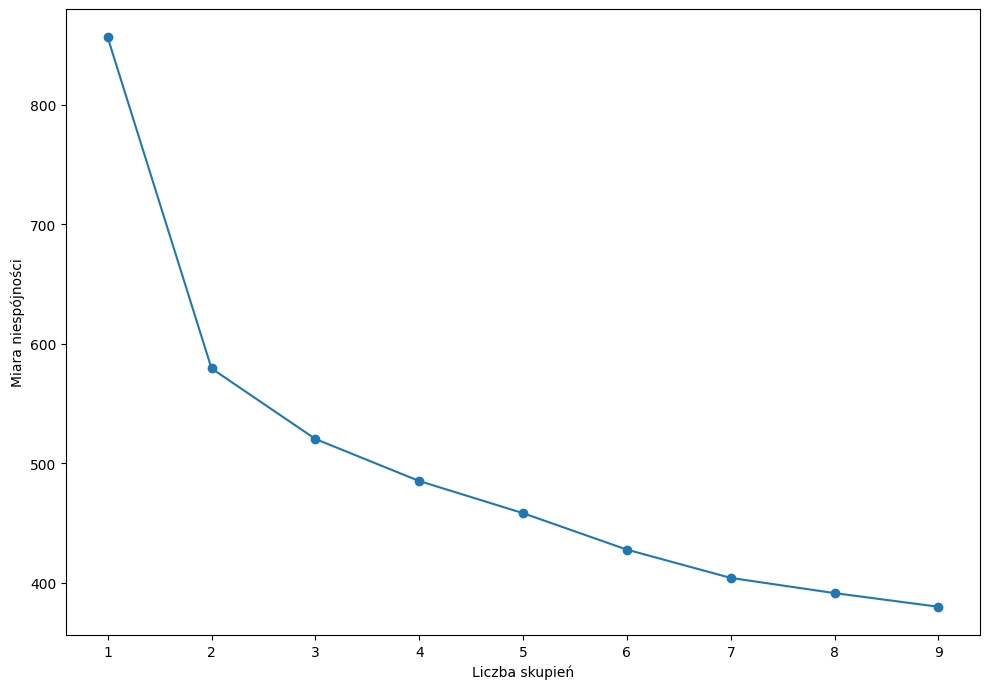

In [203]:
n = 10 #liczba eksperymentów

featuresA = anxiety.iloc[:,0:10] #cechy do grupowania
#print(features)

results = []
for k in range(1, n):
        
    #Utworzenie obiektu do grupowania    
    kmeans = KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,random_state=0)
    kmeans.fit(featuresA)
    
    #Obliczenie jakości grupowania
    #Miara niespójności skupień: suma kwadratów odległości obiektów do środka najbliższego skupienia
    inertia = kmeans.inertia_ #Powinna być jak najmniejsza
    
    results.append(inertia)
    
    print("*** Eksperyment numer:"+str(k)+" Jakość=",inertia)

#Na podstawie poniższego wykresu wybieramy takie k, które jest bliskie punktu przegięcia 
#Widać, że w tym przypadku optymalne k=3

fig = plt.figure(figsize=(10, 7))
plt.plot(range(1,n), results , marker='o')
plt.xlabel('Liczba skupień')
plt.ylabel('Miara niespójności')
plt.tight_layout()
plt.show()

*** Eksperyment numer:1 Jakość= 564.3440860215053
*** Eksperyment numer:2 Jakość= 382.9952153110048
*** Eksperyment numer:3 Jakość= 316.83202371105597
*** Eksperyment numer:4 Jakość= 288.6246844319776
*** Eksperyment numer:5 Jakość= 260.2385918003565
*** Eksperyment numer:6 Jakość= 246.4229548229548
*** Eksperyment numer:7 Jakość= 229.3354700854701
*** Eksperyment numer:8 Jakość= 217.62803776683086
*** Eksperyment numer:9 Jakość= 209.02023809523808


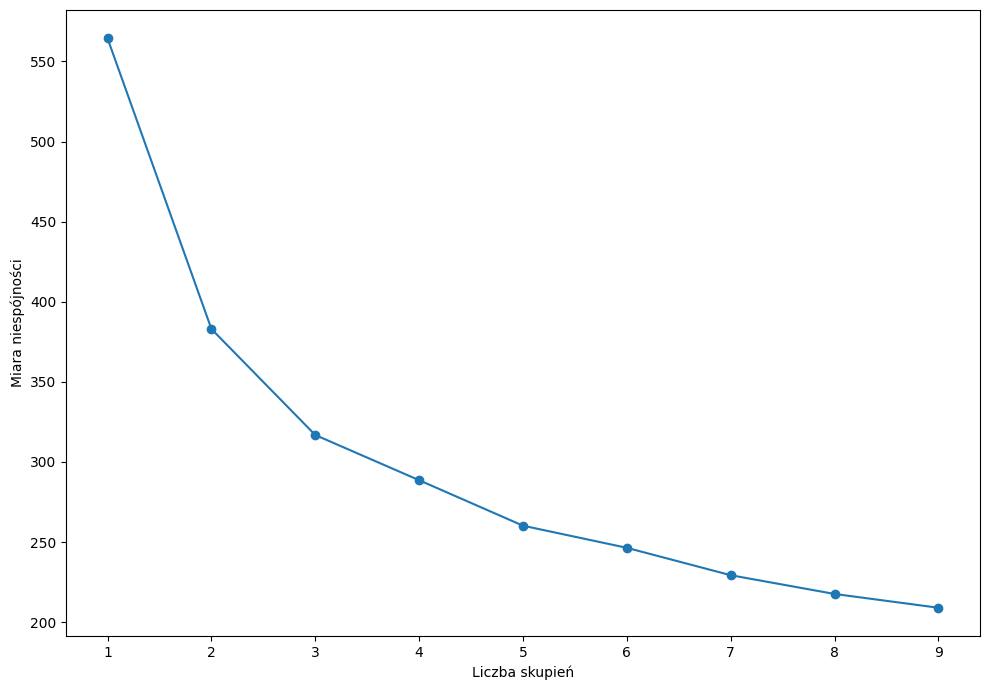

In [204]:
n = 10 #liczba eksperymentów

featuresD = depression.iloc[:,0:10] #cechy do grupowania
#print(features)

results = []
for k in range(1, n):
        
    #Utworzenie obiektu do grupowania    
    kmeans = KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,random_state=0)
    kmeans.fit(featuresD)
    
    #Obliczenie jakości grupowania
    #Miara niespójności skupień: suma kwadratów odległości obiektów do środka najbliższego skupienia
    inertia = kmeans.inertia_ #Powinna być jak najmniejsza
    
    results.append(inertia)
    
    print("*** Eksperyment numer:"+str(k)+" Jakość=",inertia)

#Na podstawie poniższego wykresu wybieramy takie k, które jest bliskie punktu przegięcia 
#Widać, że w tym przypadku optymalne k=3

fig = plt.figure(figsize=(10, 7))
plt.plot(range(1,n), results , marker='o')
plt.xlabel('Liczba skupień')
plt.ylabel('Miara niespójności')
plt.tight_layout()
plt.show()

# K-means

In [205]:
#Grupowanie - anxiety:

kmeans = KMeans(n_clusters=3, #Liczba skupień
                init='k-means++',
                n_init=10,
                max_iter=300, #Maksymalna liczba iteracji algorytmu
                random_state=0, #Ustawienie ziarna generatora liczb pseudo-losowych                
               )

kmeans.fit(featuresA) #Grupowanie

inertia = kmeans.inertia_
print("Miara jakości=",inertia);

centroids = kmeans.cluster_centers_
print("Centroidy: \n",centroids)

Miara jakości= 520.343776106934
Centroidy: 
 [[2.48148148 2.         2.11111111 2.         1.96296296 1.81481481
  1.18518519 2.03703704 2.         1.81481481]
 [1.21052632 0.54385965 0.92982456 0.89473684 0.43859649 0.61403509
  0.07017544 0.71929825 0.59649123 0.66666667]
 [2.04761905 1.26190476 1.76190476 1.5        1.02380952 1.19047619
  0.4047619  1.88095238 1.11904762 1.45238095]]


In [206]:
#Grupowanie - depression:

kmeans = KMeans(n_clusters=3, #Liczba skupień
                init='k-means++',
                n_init=10,
                max_iter=300, #Maksymalna liczba iteracji algorytmu
                random_state=0, #Ustawienie ziarna generatora liczb pseudo-losowych                
               )

kmeans.fit(featuresD) #Grupowanie

inertia = kmeans.inertia_
print("Miara jakości=",inertia);

centroids = kmeans.cluster_centers_
print("Centroidy: \n",centroids)

Miara jakości= 316.83202371105597
Centroidy: 
 [[0.11111111 0.38888889 0.41666667 0.88888889 0.5        0.36111111
  0.61111111 0.19444444 0.41666667 0.36111111]
 [1.11538462 1.26923077 1.11538462 3.         1.96153846 1.07692308
  1.46153846 1.15384615 1.73076923 1.69230769]
 [1.12903226 0.93548387 0.83870968 1.         1.09677419 0.96774194
  1.16129032 1.         1.19354839 1.06451613]]


# Wizualizacja skupień 
Metoda PCA

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


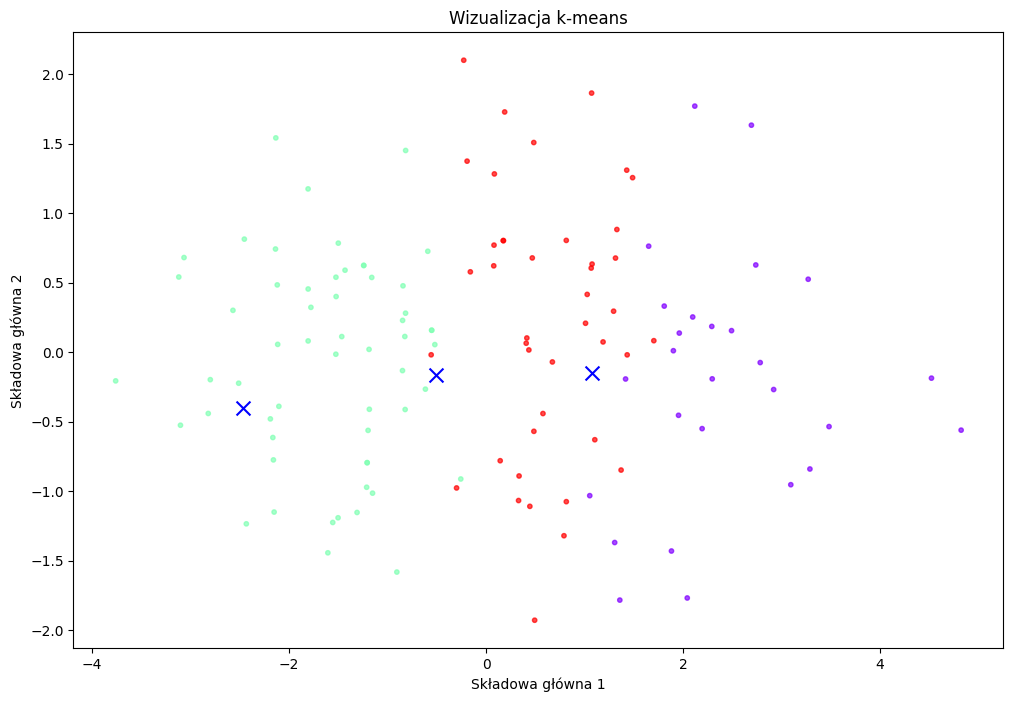

In [207]:
#Anxiety
clustersA = kmeans.fit_predict(featuresA)

#Redukcja wymiarów za pomocą PCA - dane są sprowadzane do 2 wymiarów
pca = PCA(n_components=2)
features_pca = pca.fit_transform(featuresA)
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(12, 8))
plt.title('Wizualizacja k-means')
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clustersA, cmap='rainbow', s=10, alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, color='blue', marker='x')
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


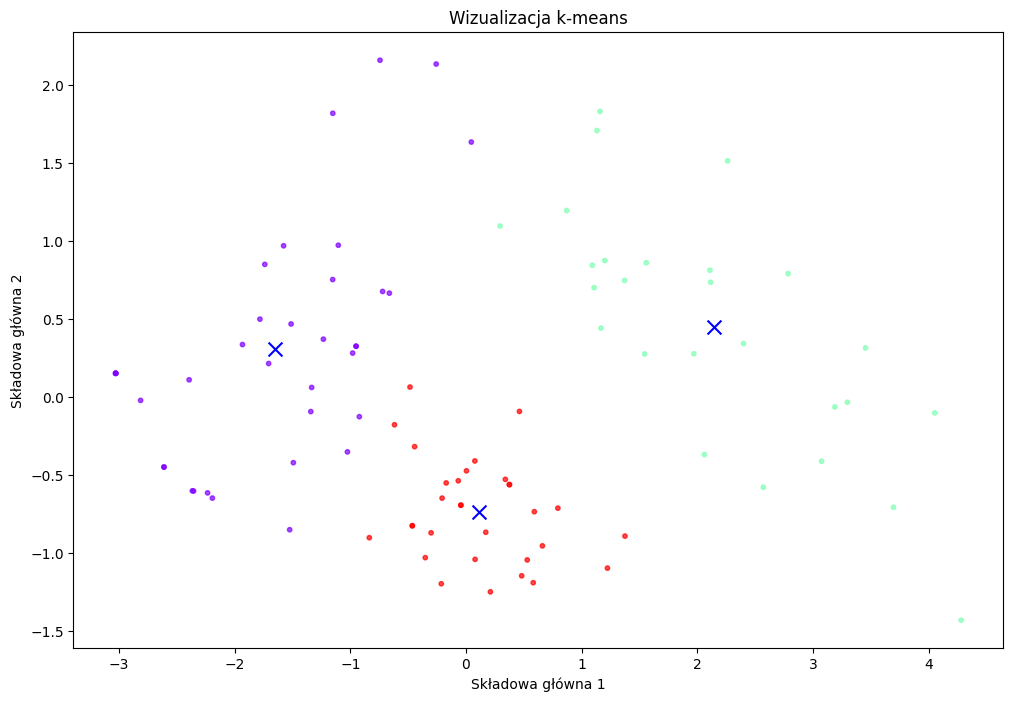

In [208]:
#Depression
clusters = kmeans.fit_predict(featuresD)

#Redukcja wymiarów za pomocą PCA - dane są sprowadzane do 2 wymiarów
pca = PCA(n_components=2)
features_pca = pca.fit_transform(featuresD)
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(12, 8))
plt.title('Wizualizacja k-means')
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='rainbow', s=10, alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, color='blue', marker='x')
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.show()

# Grupowanie metodą hierarchiczną

In [209]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
ac.fit(featuresA)

print(len(featuresA))

clustersA = ac.fit_predict(featuresA)

for i in range(0,len(clustersA)):
    print("Obiekt numer:"+str(i)," Skupienie:"+str(clustersA[i]))

126
Obiekt numer:0  Skupienie:0
Obiekt numer:1  Skupienie:0
Obiekt numer:2  Skupienie:3
Obiekt numer:3  Skupienie:0
Obiekt numer:4  Skupienie:1
Obiekt numer:5  Skupienie:0
Obiekt numer:6  Skupienie:0
Obiekt numer:7  Skupienie:1
Obiekt numer:8  Skupienie:0
Obiekt numer:9  Skupienie:1
Obiekt numer:10  Skupienie:1
Obiekt numer:11  Skupienie:3
Obiekt numer:12  Skupienie:1
Obiekt numer:13  Skupienie:3
Obiekt numer:14  Skupienie:1
Obiekt numer:15  Skupienie:1
Obiekt numer:16  Skupienie:1
Obiekt numer:17  Skupienie:1
Obiekt numer:18  Skupienie:3
Obiekt numer:19  Skupienie:0
Obiekt numer:20  Skupienie:0
Obiekt numer:21  Skupienie:0
Obiekt numer:22  Skupienie:1
Obiekt numer:23  Skupienie:0
Obiekt numer:24  Skupienie:1
Obiekt numer:25  Skupienie:1
Obiekt numer:26  Skupienie:0
Obiekt numer:27  Skupienie:1
Obiekt numer:28  Skupienie:0
Obiekt numer:29  Skupienie:1
Obiekt numer:30  Skupienie:1
Obiekt numer:31  Skupienie:0
Obiekt numer:32  Skupienie:1
Obiekt numer:33  Skupienie:0
Obiekt numer:34  Sku

In [210]:
ac = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
ac.fit(featuresD)

clustersD = ac.fit_predict(featuresD)

for i in range(0,len(clustersD)):
    print("Obiekt numer:"+str(i)," Skupienie:"+str(clustersD[i]))

Obiekt numer:0  Skupienie:1
Obiekt numer:1  Skupienie:0
Obiekt numer:2  Skupienie:1
Obiekt numer:3  Skupienie:0
Obiekt numer:4  Skupienie:1
Obiekt numer:5  Skupienie:3
Obiekt numer:6  Skupienie:0
Obiekt numer:7  Skupienie:0
Obiekt numer:8  Skupienie:0
Obiekt numer:9  Skupienie:0
Obiekt numer:10  Skupienie:1
Obiekt numer:11  Skupienie:1
Obiekt numer:12  Skupienie:3
Obiekt numer:13  Skupienie:0
Obiekt numer:14  Skupienie:0
Obiekt numer:15  Skupienie:0
Obiekt numer:16  Skupienie:1
Obiekt numer:17  Skupienie:0
Obiekt numer:18  Skupienie:3
Obiekt numer:19  Skupienie:0
Obiekt numer:20  Skupienie:0
Obiekt numer:21  Skupienie:1
Obiekt numer:22  Skupienie:0
Obiekt numer:23  Skupienie:0
Obiekt numer:24  Skupienie:1
Obiekt numer:25  Skupienie:0
Obiekt numer:26  Skupienie:0
Obiekt numer:27  Skupienie:1
Obiekt numer:28  Skupienie:1
Obiekt numer:29  Skupienie:1
Obiekt numer:30  Skupienie:0
Obiekt numer:31  Skupienie:0
Obiekt numer:32  Skupienie:1
Obiekt numer:33  Skupienie:0
Obiekt numer:34  Skupien

# Wizualizacje grupowania hierarchicznego

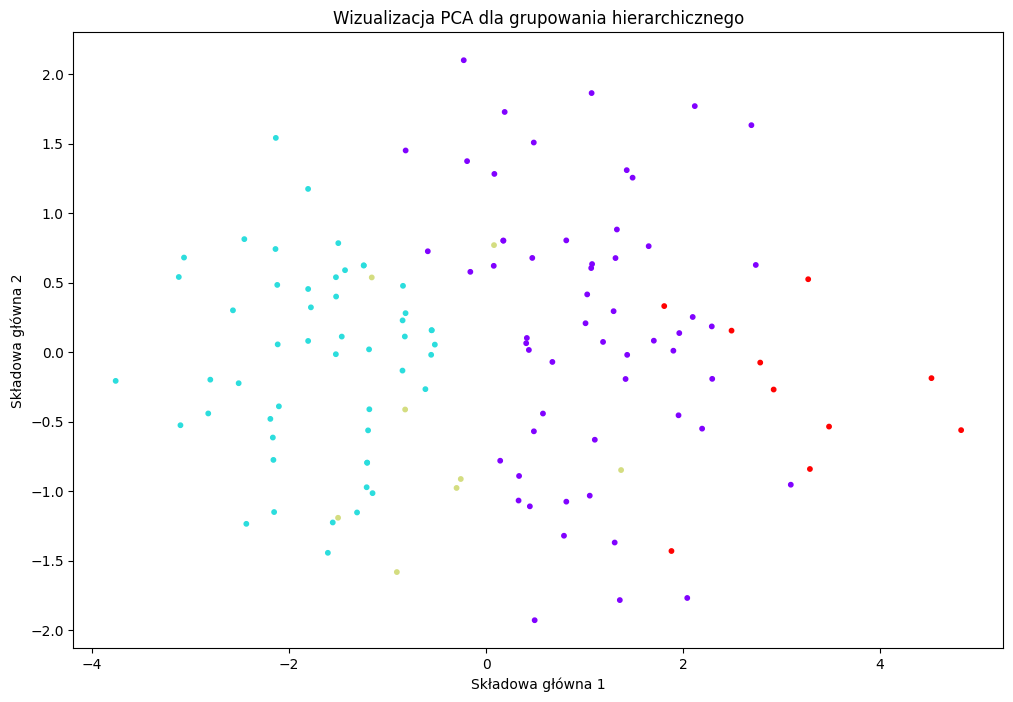

In [211]:
import scipy.cluster.hierarchy as shc
#Anxiety
# Redukcja wymiarów za pomocą PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(featuresA)

plt.figure(figsize=(12, 8))
plt.title('Wizualizacja PCA dla grupowania hierarchicznego')
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clustersA, s=10, alpha=0.99, cmap='rainbow')
plt.xlabel("Składowa główna 1")
plt.ylabel("Składowa główna 2")
plt.show()

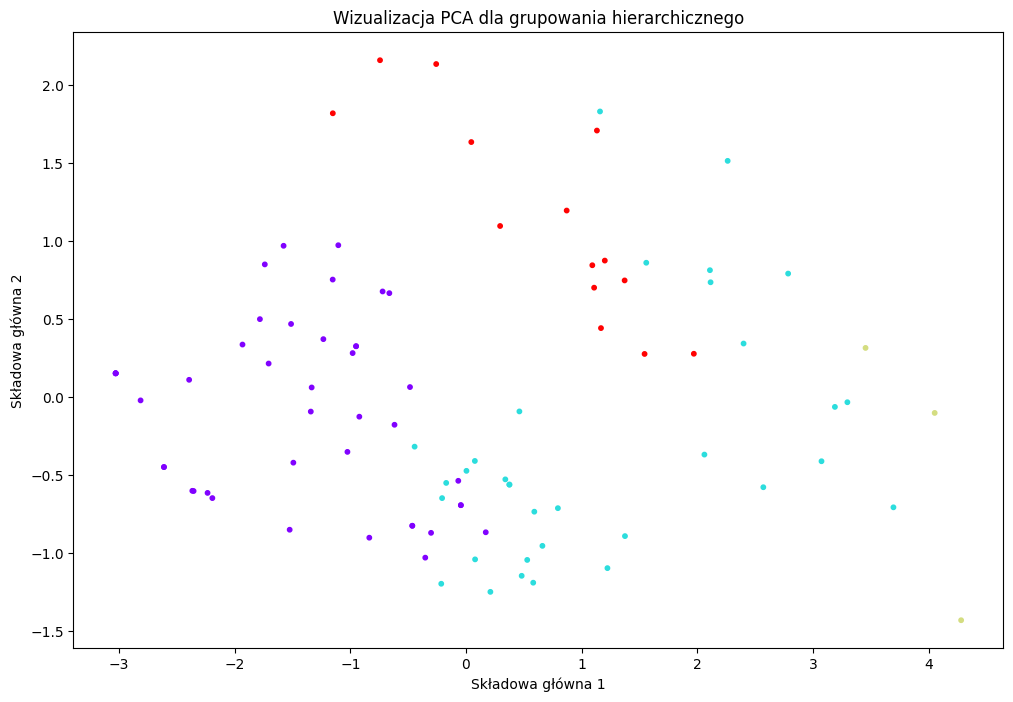

In [212]:
#Depression
# Redukcja wymiarów za pomocą PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(featuresD)

plt.figure(figsize=(12, 8))
plt.title('Wizualizacja PCA dla grupowania hierarchicznego')
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clustersD, s=10, alpha=0.99, cmap='rainbow')
plt.xlabel("Składowa główna 1")
plt.ylabel("Składowa główna 2")
plt.show()

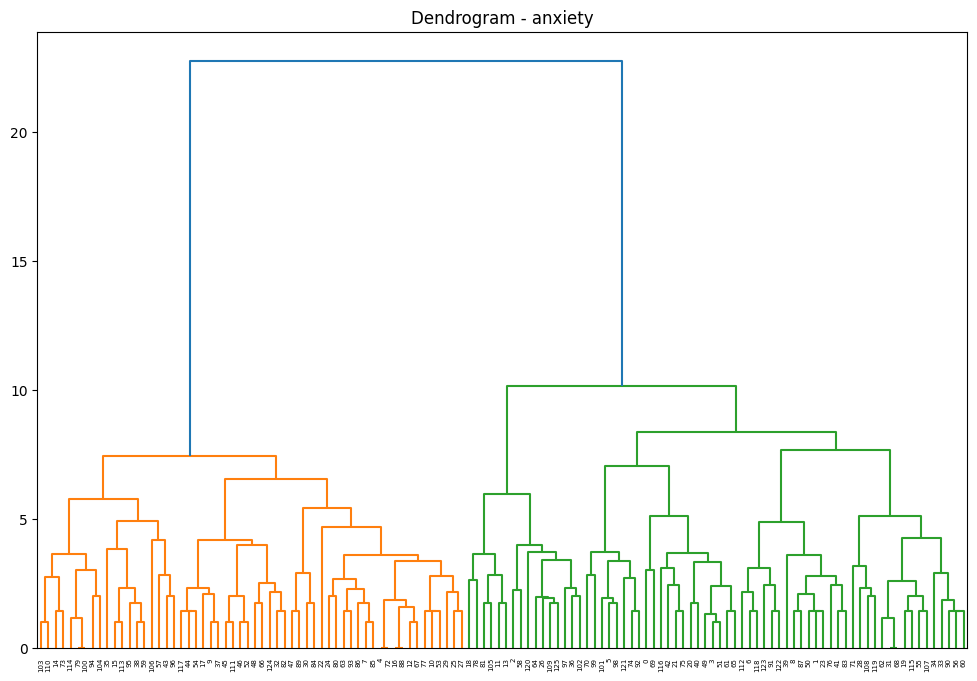

In [213]:
#Dendrogram - anxiety

plt.figure(figsize=(12, 8))
plt.title("Dendrogram - anxiety")
dend = shc.dendrogram(shc.linkage(featuresA, method='ward'))
plt.show()

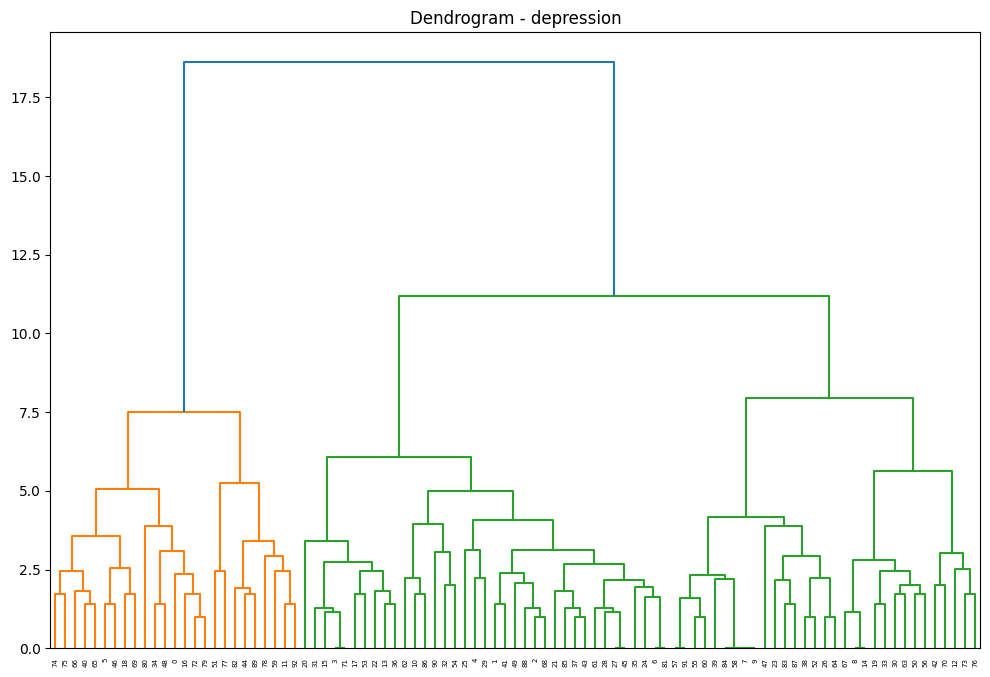

In [214]:
plt.figure(figsize=(12, 8))
plt.title("Dendrogram - depression")
dend = shc.dendrogram(shc.linkage(featuresD, method='ward'))
plt.show()

In [215]:
# Przypisanie grup do danych
anxietyGroups = anxiety.copy()
new_column = pd.Series(clustersA, name='group')
anxietyGroups = pd.concat([anxietyGroups, new_column], axis=1)

#print(anxietyGroups.head(10))

#Zestawienie wszystkich grup z wszystkimi
wiersze = []

for i in range(len(anxietyGroups)-1):
    for j in range(len(anxietyGroups)-1):
        if i != j:
            index_i = pd.Series(anxietyGroups.index[i], index=['index_i'])
            features_i = anxietyGroups.iloc[i,0:9].reset_index(drop=True)
            features_i.index = [f'feature_{k+1}_i' for k in range(len(features_i))]
            group_i = pd.Series(anxietyGroups.iloc[i,13], index=['group_i'])
            index_j = pd.Series(anxietyGroups.index[j], index=['index_j'])
            features_j = anxietyGroups.iloc[j,0:9].reset_index(drop=True)
            features_j.index = [f'feature_{k+1}_j' for k in range(len(features_j))]
            group_j = pd.Series(anxietyGroups.iloc[j,13], index=['group_j'])
            wiersz = pd.concat([features_i, features_j, index_i , group_i, index_j, group_j], axis=0)
            wiersze.append(wiersz)

anxietyZestawienie = pd.DataFrame(wiersze)

In [227]:
print(anxietyZestawienie.tail(5))

      feature_1_i feature_2_i feature_3_i feature_4_i feature_5_i feature_6_i  \
15495           1           0           0           2           0           0   
15496           1           0           0           2           0           0   
15497           1           0           0           2           0           0   
15498           1           0           0           2           0           0   
15499           1           0           0           2           0           0   

      feature_7_i feature_8_i feature_9_i feature_1_j  ... feature_4_j  \
15495           0           0           0           2  ...           1   
15496           0           0           0           2  ...           2   
15497           0           0           0           2  ...           1   
15498           0           0           0           1  ...           2   
15499           0           0           0           2  ...           2   

      feature_5_j feature_6_j feature_7_j feature_8_j feature_9_j in

# Drzewo decyzyjne

In [221]:
#Anxiety
anxietyData = pd.concat([anxiety.iloc[:,0:9], new_column], axis=1)
print(len(anxietyData))

noColumn = anxietyData.shape[1]
featuresA = anxietyData.iloc[:,:noColumn-1]
labelsA = anxietyData.iloc[:,[noColumn-1]]

datasetsA = train_test_split(featuresA, labelsA, test_size=0.3, random_state=1234)

#Dla test_size = 0.4 i 0.2 dokładność jest niższa - optymalna dla 0.3

features_train = datasetsA[0]
features_test = datasetsA[1]
labels_train = datasetsA[2]
labels_test = datasetsA[3]

#Parametry drzewa
model =  DecisionTreeClassifier(criterion='gini', 
                               max_depth=5,
                               min_samples_split=10,                                
                               min_samples_leaf=10,
                               max_leaf_nodes=30,
                               min_impurity_decrease=0.02)

model.fit(features_train, np.ravel(labels_train))
labels_predicted = model.predict(features_test)
accuracy = metrics.accuracy_score(labels_test, labels_predicted)
print(f"Dokładność: {accuracy}")
print("========= PEŁNE WYNIKI KLASYFIKACJI ================")
report = classification_report(labels_test, labels_predicted)
print(report )
print("====== MACIERZ POMYŁEK (confusion matrix) +=========")
conf_matrix = confusion_matrix(labels_test, labels_predicted)
print(conf_matrix)

126
Dokładność: 0.8157894736842105
========= PEŁNE WYNIKI KLASYFIKACJI ================
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        18
           1       0.93      0.87      0.90        15
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2

    accuracy                           0.82        38
   macro avg       0.42      0.47      0.44        38
weighted avg       0.72      0.82      0.76        38

====== MACIERZ POMYŁEK (confusion matrix) +=========
[[18  0  0  0]
 [ 2 13  0  0]
 [ 2  1  0  0]
 [ 2  0  0  0]]


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Wizualizacja tekstowa:
|--- f_7 <= 1.50
|   |--- f_2 <= 1.50
|   |   |--- class: 1
|   |--- f_2 >  1.50
|   |   |--- class: 0
|--- f_7 >  1.50
|   |--- f_8 <= 0.50
|   |   |--- class: 0
|   |--- f_8 >  0.50
|   |   |--- f_5 <= 1.50
|   |   |   |--- class: 0
|   |   |--- f_5 >  1.50
|   |   |   |--- class: 0



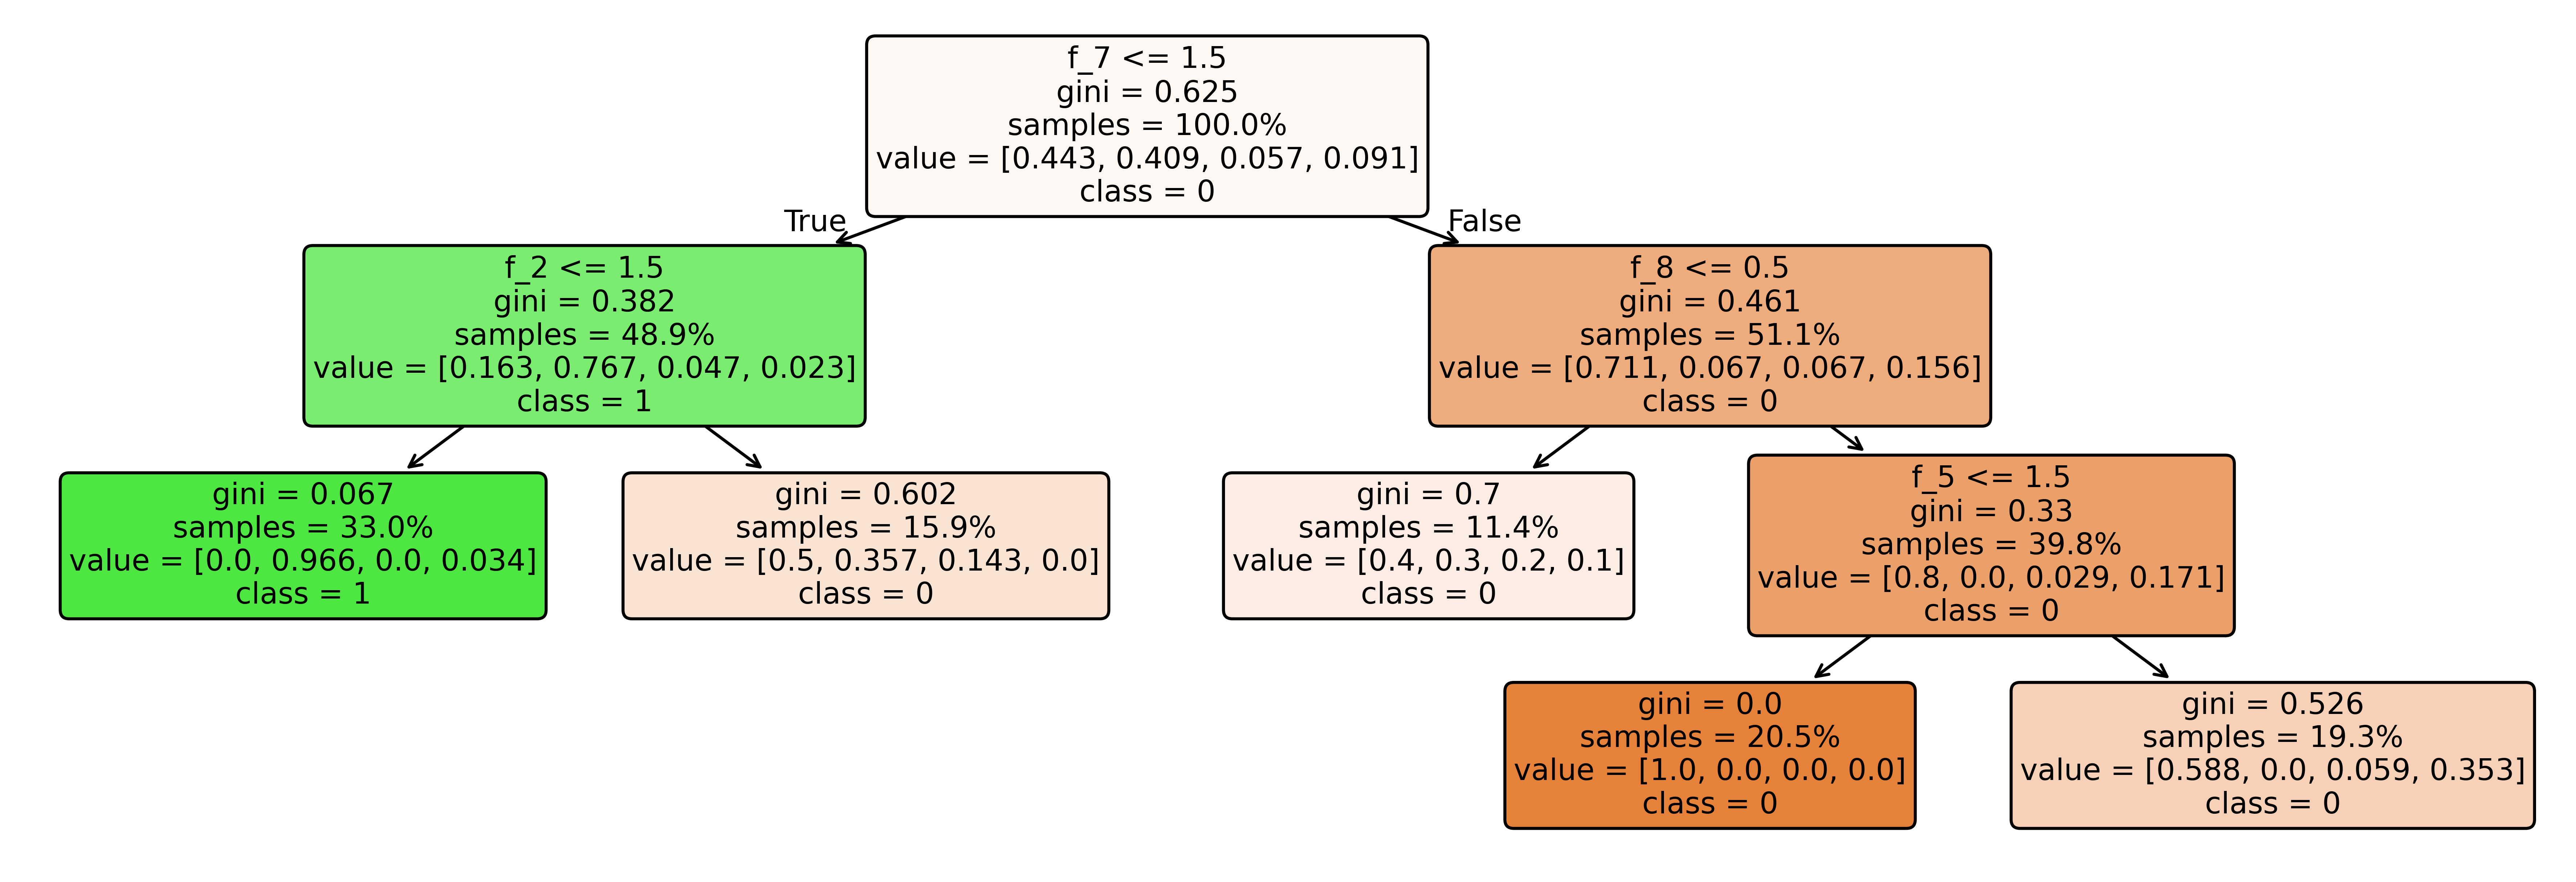

In [225]:
features_names = list(featuresA)
from sklearn import tree
from sklearn.tree import plot_tree

#Pozyskiwanie wartości decyzji
class_names_ordered = sorted(np.unique(labelsA))
my_class_names = []
for i in range(0,len(class_names_ordered)):
    my_class_names.append(str(class_names_ordered[i]))

text_representation = tree.export_text(model,feature_names=features_names,class_names=my_class_names,)
print("Wizualizacja tekstowa:")
print(text_representation)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,5), dpi = 600)
plot_tree(model, feature_names=features_names, class_names=my_class_names, rounded=True, filled=True, proportion=True);

In [ ]:
# Reguły decyzyjne
anxietyRules = anxietyZestawienie.copy()
print(anxietyRules.head(1))

#Zestawienie wszystkich grup z wszystkimi
rows = []

for i in range(len(anxietyRules)-1):
    row = anxietyRules.iloc[i]
    col1 = pd.Series(f"{row['feature_1_i']} - {row['feature_1_j']}")
    col2 = pd.Series(f"{row['feature_2_i']} - {row['feature_2_j']}")
    col3 = pd.Series(f"{row['feature_3_i']} - {row['feature_3_j']}")
    col4 = pd.Series(f"{row['feature_4_i']} - {row['feature_4_j']}")
    col5 = pd.Series(f"{row['feature_5_i']} - {row['feature_5_j']}")
    col6 = pd.Series(f"{row['feature_6_i']} - {row['feature_6_j']}")
    col7 = pd.Series(f"{row['feature_7_i']} - {row['feature_7_j']}")
    col8 = pd.Series(f"{row['feature_8_i']} - {row['feature_8_j']}")
    col9 = pd.Series(f"{row['feature_9_i']} - {row['feature_9_j']}")
    col10 = pd.Series(f"{row['group_i']} - {row['group_j']}")
    wiersz = pd.concat([col1, col2, col3, col4, col5, col6, col7, col8, col9], axis = 0)
    rows.append(wiersz)

anxietyRules = pd.DataFrame(rows)
print("XD")
print(anxietyRules)

In [ ]:
print(anxietyRules)

#Jedna analiza na połączonych i na osobnych
Do formularza dopisać opis testów, czego dotyczą. Wstawić, że celem jest pogrupowanie i obliczanie reguł przejść pomiędzy grupami. Że będą grupy, że opisują stan relacji małżonków (bo my te grupy zaetykietujemy), potem będzie przechodzenie z grupy do grupy i reguły przejścia, więcej szczegółów, bardziej konkretnie o co tu chodzi
ŻEBY RECENZENT WIDZIAŁ INNOWACJĘ!!!
"Reguły pozwalające na zmiany wart. pewnych atrybutów które decydują o przynależności do grupy"
Przemyśleć wszystkie kroki
Eksperymenty na różnych paramentach, czyli nawet jak wychodzi łokciem 2, to i tak dla innych można zrobić eksperymenty
3 pomysły:
- Rses???
- drzewo decyzyjne
- LEM2
Jak będziemy tam, to zobaczymy
Tytuł zmienić: Automatyczne planowanie terapii małżeństw 


Wsparcie - jeśli wynika z wielu par to jest ważniejsza
druga metoda - robimy tabelę wag wg własnego postrzegania, co jest łatwiej zmienić


Grupujemy pary i osoby pojedynczo.
Czy małżeństwo sprzyja tym zaburzeniom? Czy jak jest sama osoba, to wychodzi co innego niż z partnerem, inna grupa